<AxesSubplot: >

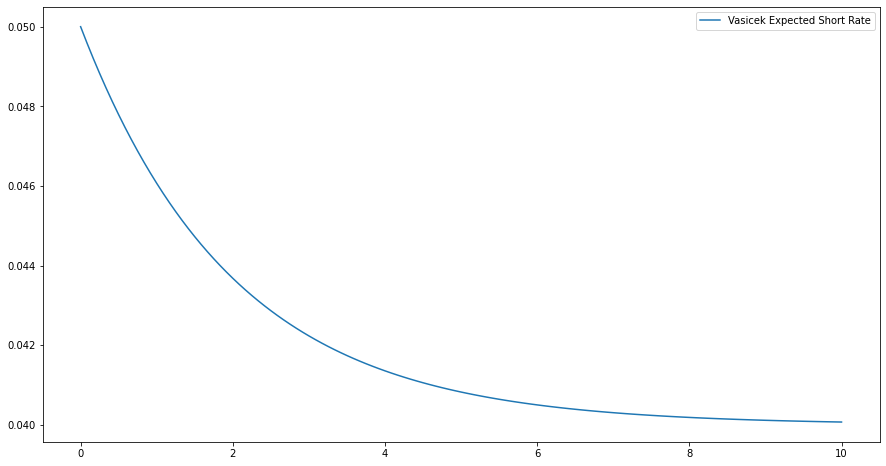

In [1]:
from dynamics import *
import seaborn as sns
import matplotlib.pyplot as plt

testDynamic = Vasicek(initial=0.05, mean=0.02, reversion=-0.5, volatility=0.02)
# testDynamic.create_path(stepsize=1/12, duration=15, seed=2023)
plt.figure(figsize=(15,8))
expected = [testDynamic.expectedRate(x) for x in np.arange(0,10*12+1)/12]
sns.lineplot(x=np.arange(0,10*12+1)/12, y=expected, label="Vasicek Expected Short Rate")


<AxesSubplot: >

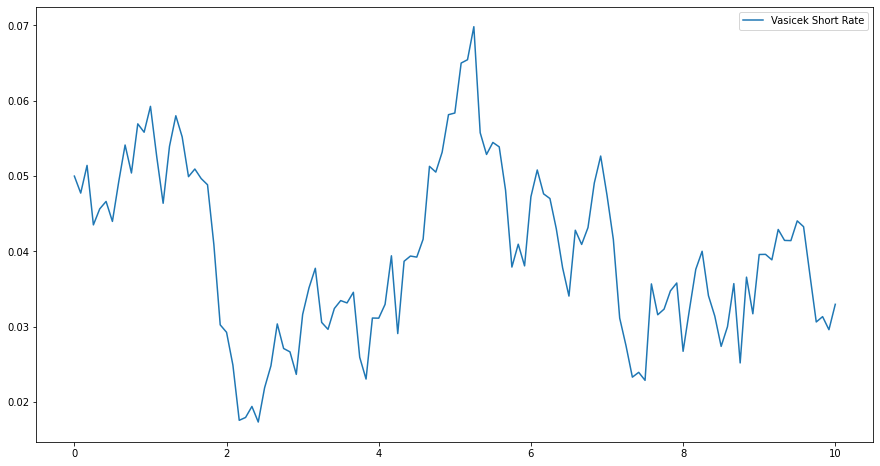

In [2]:
time, rate = testDynamic.create_path(stepsize=1/12, duration=10, seed=1999)
plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=rate, label="Vasicek Short Rate")

<AxesSubplot: >

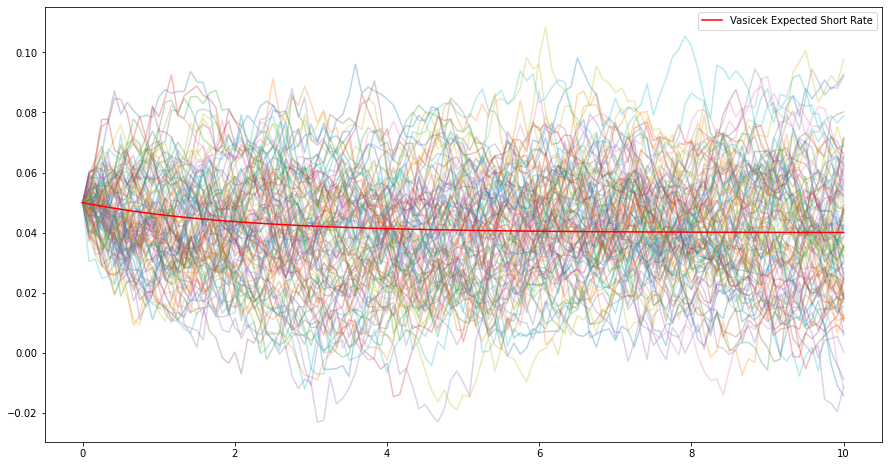

In [3]:
#Some more sims
plt.figure(figsize=(15,8))
for i in range(100):
    time, rate = testDynamic.create_path(stepsize=1/12, duration=10, seed=i)
    sns.lineplot(x=time, y=rate, alpha=0.3)
sns.lineplot(x=np.arange(0,10*12+1)/12, y=expected, label="Vasicek Expected Short Rate", c='red')

<AxesSubplot: >

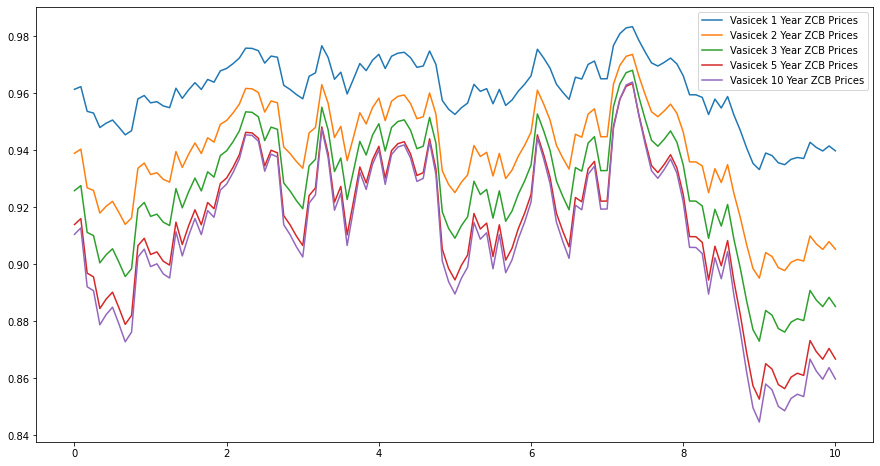

In [4]:
plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=[testDynamic.ZCB(1,x) for x in rate], label = "Vasicek 1 Year ZCB Prices")
sns.lineplot(x=time, y=[testDynamic.ZCB(2,x) for x in rate], label = "Vasicek 2 Year ZCB Prices")
sns.lineplot(x=time, y=[testDynamic.ZCB(3,x) for x in rate], label = "Vasicek 3 Year ZCB Prices")
sns.lineplot(x=time, y=[testDynamic.ZCB(5,x) for x in rate], label = "Vasicek 5 Year ZCB Prices")
sns.lineplot(x=time, y=[testDynamic.ZCB(10,x) for x in rate], label = "Vasicek 10 Year ZCB Prices")

# Payer Swap testing
For simplicity the fixed and floating payments are equal <br>
The swap is initiated at t=0 and the last swap is made at t=10

<AxesSubplot: >

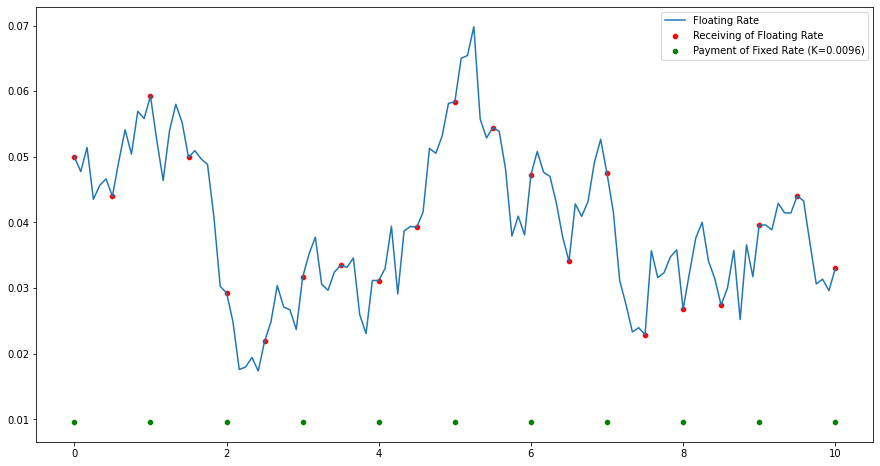

In [5]:
from products import *
from scipy import optimize
fixSchedule = np.arange(0,10+1)
floSchedule = np.arange(0,20+1)/2
time, floatRate = testDynamic.create_path(1/12, 10, 1999)
# (Non analytical way to find par swap rate)
K = parSwapRate(
    fixedSchedule=fixSchedule, 
    floatingSchedule=floSchedule,
    rate=testDynamic.init, 
    model=testDynamic)
plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=floatRate, label='Floating Rate')
sns.scatterplot(x=floSchedule, y=floatRate[0::6], label='Receiving of Floating Rate', c='red')
sns.scatterplot(x=fixSchedule, y=np.repeat(K, len(fixSchedule)), label=f'Payment of Fixed Rate (K={round(K,4)})', c='green')

<AxesSubplot: >

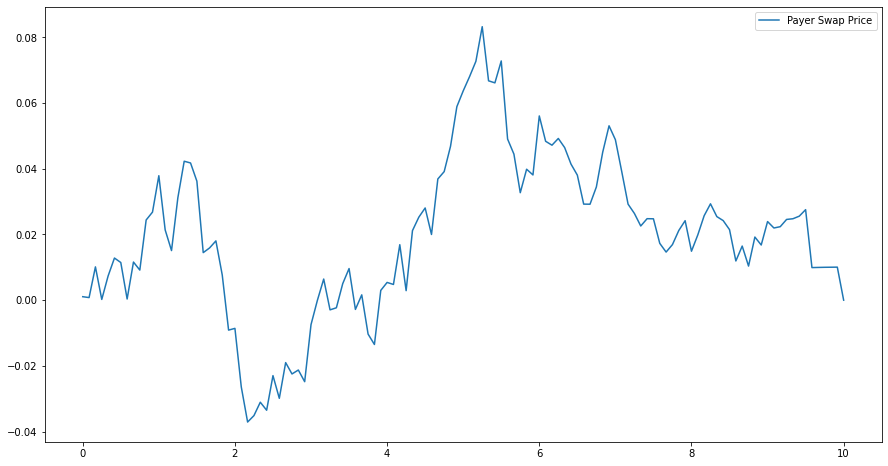

In [6]:
payerSwapPrice = [
payerSwap(
    time=x, 
    fixedSchedule=fixSchedule, 
    floatingSchedule=floSchedule, 
    fixedRate=K, 
    floatingRate=floatRate, 
    floatingTimeStamp=time,
    model=testDynamic
)
for x in time
]

plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=payerSwapPrice, label='Payer Swap Price')

<AxesSubplot: >

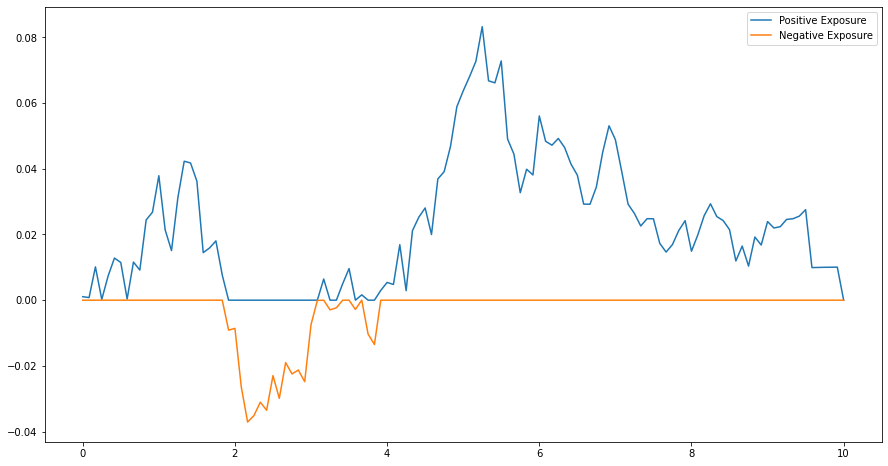

In [7]:
plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=np.maximum(payerSwapPrice,0), label='Positive Exposure')
sns.lineplot(x=time, y=np.minimum(np.array(payerSwapPrice),0), label='Negative Exposure')

In [8]:
time

array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ,
        2.08333333,  2.16666667,  2.25      ,  2.33333333,  2.41666667,
        2.5       ,  2.58333333,  2.66666667,  2.75      ,  2.83333333,
        2.91666667,  3.        ,  3.08333333,  3.16666667,  3.25      ,
        3.33333333,  3.41666667,  3.5       ,  3.58333333,  3.66666667,
        3.75      ,  3.83333333,  3.91666667,  4.        ,  4.08333333,
        4.16666667,  4.25      ,  4.33333333,  4.41666667,  4.5       ,
        4.58333333,  4.66666667,  4.75      ,  4.83333333,  4.91666667,
        5.        ,  5.08333333,  5.16666667,  5.25      ,  5.33333333,
        5.41666667,  5.5       ,  5.58333333,  5.66666667,  5.75

In [26]:
sims = np.power(10,5)
years=10
dt=1/360
EPE = np.zeros(int(years/dt+1))
ENE = np.zeros(int(years/dt+1))
K = parSwapRate(
    fixedSchedule=fixSchedule, 
    floatingSchedule=floSchedule,
    rate=testDynamic.init, 
    model=testDynamic)
time, floatRate = testDynamic.create_path(stepsize=dt, duration=years, seed=0)
discouting = np.array([testDynamic.ZCB(x) for x in time])

for i in range(sims):
    print(f"Process: {np.round(i/sims,0)*100}%")
    fixSchedule = np.arange(0,10+1)
    floSchedule = np.arange(0,20+1)/2
    time, floatRate = testDynamic.create_path(stepsize=dt, duration=years, seed=i)
    payerSwapPrice=[
    payerSwap(
        time=x, 
        fixedSchedule=fixSchedule, 
        floatingSchedule=floSchedule, 
        fixedRate=K, 
        floatingRate=floatRate, 
        floatingTimeStamp=time,
        model=testDynamic
    )
    for x in time
    ]

    posExposure = np.maximum(payerSwapPrice, 0) * discouting
    negExposure = np.minimum(payerSwapPrice, 0) * discouting

    EPE += posExposure
    ENE += negExposure

plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=EPE/sims, label='MC Positive Exposure')
sns.lineplot(x=time, y=ENE/sims, label='MC Negative Exposure')
plt.grid()

 Process: 0.0%

In [13]:
# Default intensity
lc = 0.05
li = 0.01

def survival(intensity, duration):
    return np.exp(-intensity*duration)

Sc = np.array([survival(lc, x) for x in time])

Si = np.array([survival(li, x) for x in time])

dQc=-np.diff(np.insert(Sc, 0, 1))

dQi=-np.diff(np.insert(Si, 0, 1))

LGDc=1
LGDi=1

In [22]:
CVA = -LGDc*sum(Si*dQc*EPE/sims)
DVA = -LGDi*sum(Sc*dQi*ENE/sims)
(np.power(10,8)*CVA, np.power(10,8)*DVA)

(-997853.4372891418, 41586.53883172764)